In [ ]:
# If your code is in apriori_code.py
from Aprior import Apriori, AssociationRulesGenerator


In [2]:
transactions = []
with open("T10I4D100K.dat", "r") as f:
    for line in f:
        line = line.strip()
        if line:
            transactions.append(list(map(int, line.split())))

print(f"Number of transactions: {len(transactions)}")


Number of transactions: 100000


In [3]:
import time
import matplotlib.pyplot as plt

In [4]:
support_values = [500, 1000, 2000, 5000, 10000]
execution_times = []
num_frequent_items = []


In [5]:
for s in support_values:
    print(f"\nRunning Aprior with support = {s}...")
    start_time = time.time()
    
    ap = Apriori(transactions, support=s)
    all_frequent = ap.run(max_k=5)
    
    end_time = time.time()
    execution_times.append(end_time - start_time)
    
    # Total number of frequent items across all passes
    total_items = sum(len(all_frequent[k]) for k in all_frequent)
    num_frequent_items.append(total_items)
    
    print(f"Support={s}: Execution time = {execution_times[-1]:.2f}s, Total frequent items = {total_items}")



Running Aprior with support = 500...
Running A-Priori with support threshold = 500
Pass 1: Finding frequent 1-itemsets...
  Found 569 frequent 1-itemsets
Pass 2: Finding frequent 2-itemsets...
  Found 342 frequent 2-itemsets
Pass 3: Finding frequent 3-itemsets...
  Found 110 frequent 3-itemsets
Pass 4: Finding frequent 4-itemsets...
  Found 43 frequent 4-itemsets
Pass 5: Finding frequent 5-itemsets...
  Found 9 frequent 5-itemsets
Support=500: Execution time = 6.72s, Total frequent items = 1073

Running Aprior with support = 1000...
Running A-Priori with support threshold = 1000
Pass 1: Finding frequent 1-itemsets...
  Found 375 frequent 1-itemsets
Pass 2: Finding frequent 2-itemsets...
  Found 9 frequent 2-itemsets
Pass 3: Finding frequent 3-itemsets...
  Found 1 frequent 3-itemsets
Pass 4: Finding frequent 4-itemsets...
  No frequent 4-itemsets found. Stopping.
Support=1000: Execution time = 3.12s, Total frequent items = 385

Running Aprior with support = 2000...
Running A-Priori wi

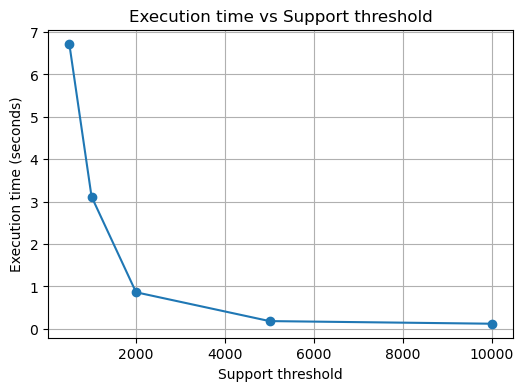

In [6]:
plt.figure(figsize=(6,4))
plt.plot(support_values, execution_times, marker='o')
plt.xlabel("Support threshold")
plt.ylabel("Execution time (seconds)")
plt.title("Execution time vs Support threshold")
plt.grid(True)
plt.show()


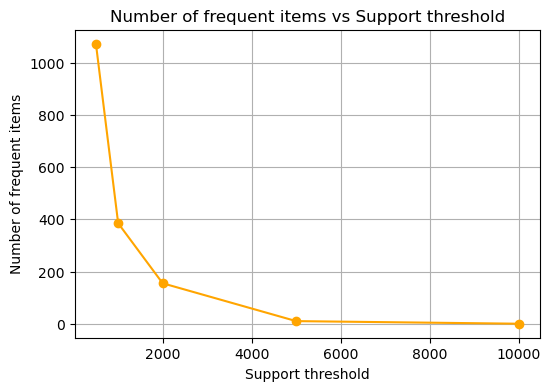

In [7]:
plt.figure(figsize=(6,4))
plt.plot(support_values, num_frequent_items, marker='o', color='orange')
plt.xlabel("Support threshold")
plt.ylabel("Number of frequent items")
plt.title("Number of frequent items vs Support threshold")
plt.grid(True)
plt.show()


Running A-Priori with support threshold = 1000
Pass 1: Finding frequent 1-itemsets...
  Found 375 frequent 1-itemsets
Pass 2: Finding frequent 2-itemsets...
  Found 9 frequent 2-itemsets
Pass 3: Finding frequent 3-itemsets...
  Found 1 frequent 3-itemsets
Pass 4: Finding frequent 4-itemsets...
  No frequent 4-itemsets found. Stopping.
  Execution time: 0.00s, Number of rules: 24
  Execution time: 0.00s, Number of rules: 19
  Execution time: 0.00s, Number of rules: 13
  Execution time: 0.00s, Number of rules: 7
  Execution time: 0.00s, Number of rules: 7
  Execution time: 0.00s, Number of rules: 5
  Execution time: 0.00s, Number of rules: 3
  Execution time: 0.00s, Number of rules: 3
  Execution time: 0.00s, Number of rules: 2


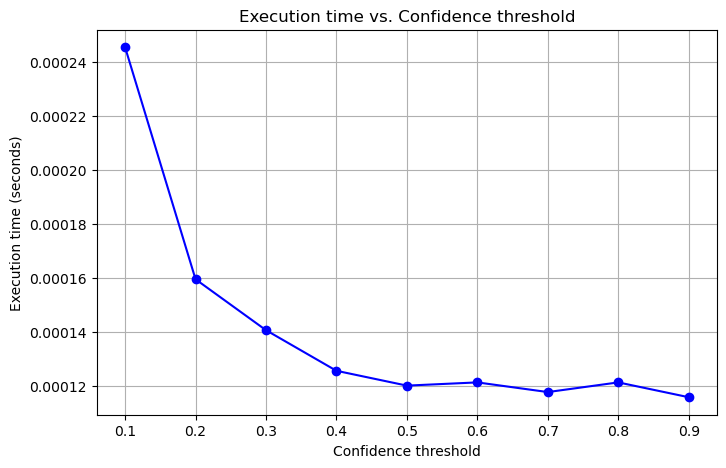

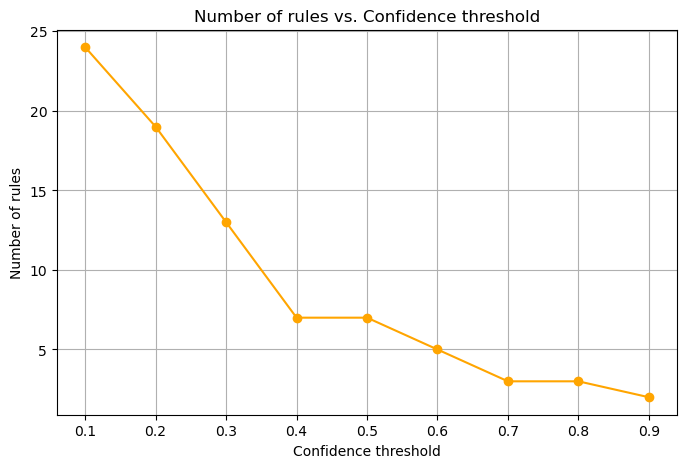

In [19]:
#Some experiments for Association rules 
# 1. Run Apriori first
ap = Apriori(transactions, support=1000)
all_frequent = ap.run(max_k=5)

# 2
confidence_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

execution_times = []
num_rules = []

for c in confidence_thresholds:
    start_time = time.time()
    # Generating rules
    rule_gen = AssociationRulesGenerator(all_frequent, c=c)
    rules = rule_gen.generate_rules(verbose=False)
    
    end_time = time.time()
    
    # Execution time
    exec_time = end_time - start_time
    execution_times.append(exec_time)
    # Number of rules
    total_rules = sum(len(v) for v in rules.values())
    num_rules.append(total_rules)
    
    print(f"  Execution time: {exec_time:.2f}s, Number of rules: {total_rules}")

# Plot Execution time vs Confidence threshold
plt.figure(figsize=(8,5))
plt.plot(confidence_thresholds, execution_times, marker='o', color='blue')
plt.xlabel('Confidence threshold')
plt.ylabel('Execution time (seconds)')
plt.title('Execution time vs. Confidence threshold')
plt.grid(True)
plt.show()

# Plot Number of rules vs Confidence threshold
plt.figure(figsize=(8,5))
plt.plot(confidence_thresholds, num_rules, marker='o', color='orange')
plt.xlabel('Confidence threshold')
plt.ylabel('Number of rules')
plt.title('Number of rules vs. Confidence threshold')
plt.grid(True)
plt.show()